# PROGETTO TEXT MINING AND SEARCH
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

Tasks performed: Text Pre-Processing, Representation, Clustering, Summarization.


- Merlo Fabrizio 847203
- Sanvito Simone 844794

## Import data and libraries

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import re
import nltk
import seaborn as sns
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
# import spacy
# nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])
from nltk.corpus import stopwords
import string
from scipy.sparse import bsr
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.cluster.elbow import KElbowVisualizer
import gensim
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import rouge
from bs4 import BeautifulSoup
from sklearn.cluster import OPTICS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             rand_score, adjusted_mutual_info_score,
                             homogeneity_score, completeness_score,
                             v_measure_score, fowlkes_mallows_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/ProgettiDataScience-SAD/2ANNO1SEMESTRE/TEXT MINING AND SEARCH/Merlo847203_SanvitoS844794/archive/Reviews.csv"
data = pd.read_csv(path)

In [ ]:
display(data) 

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

## Exploratory Analysis

Let's inspect some of the reviews.

In [ ]:
for i in range(5):
    print("Review #",i+1)
    print("Summary: ", data.Summary[i])
    print("Text: ", data.Text[i])
    print()

Review # 1
Summary:  Good Quality Dog Food
Text:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Review # 2
Summary:  Not as Advertised
Text:  Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Review # 3
Summary:  "Delight" says it all
Text:  This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, 

### Null / NaN Values

In [ ]:
data.isnull().sum() #check null values: if there is some, we remove them

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#### Summary

Controllo se ci sono NaN nella colonna summary: se ci sono, rimuovo la riga relativa.

In [ ]:
print(any(data['Summary'].isnull()))

True


In [ ]:
print(data.Summary[data.Summary.isnull()])

33958     NaN
40548     NaN
101106    NaN
102979    NaN
117515    NaN
155712    NaN
178290    NaN
198474    NaN
212691    NaN
237565    NaN
293906    NaN
299495    NaN
300961    NaN
333556    NaN
352043    NaN
357215    NaN
357814    NaN
360782    NaN
379473    NaN
380558    NaN
381313    NaN
386283    NaN
392529    NaN
484367    NaN
486640    NaN
503260    NaN
530716    NaN
Name: Summary, dtype: object


In [ ]:
print(data["Summary"].isnull().sum())

27


27 null values.
Let's remove them.

In [ ]:
data = data.dropna(subset=["Summary"])

In [ ]:
print(data.Summary[data.Summary.isnull()])
print(data["Summary"].isnull().sum())

Series([], Name: Summary, dtype: object)
0


After removing those values, now there are no Null or NaN values in this column.

#### ProfileName

In [ ]:
print(data.ProfileName[data.ProfileName.isnull()])

25509     NaN
38874     NaN
49800     NaN
67077     NaN
106550    NaN
137613    NaN
163191    NaN
172462    NaN
297275    NaN
306751    NaN
431598    NaN
440825    NaN
490412    NaN
491728    NaN
515436    NaN
560446    NaN
Name: ProfileName, dtype: object


In [ ]:
print(data["ProfileName"].isnull().sum())

16


16 null values.
Let's remove them.

In [ ]:
data = data.dropna(subset=["ProfileName"])

In [ ]:
print(data.ProfileName[data.ProfileName.isnull()])
print(data["ProfileName"].isnull().sum())

Series([], Name: ProfileName, dtype: object)
0


After removing those values, now there are no Null or NaN values in this column.

There are no Null or NaN values in this column.

### Duplicated Removal

In [ ]:
# print(data['Summary'].duplicated())

We are going to remove duplicated rows.

In [ ]:
# print(sum(data.Summary.duplicated()))
columns = ["ProductId", "UserId", "ProfileName", "Time", "Score", "Summary", "Text"]
grouped = data.groupby(columns).size()

# Select the groups with more than one row
duplicates = grouped[grouped > 1]

# Print the duplicated rows
print(duplicates)

ProductId   UserId          ProfileName                                   Time        Score  Summary                                                     Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
# display(data[(data["UserId"] == "A3TVZM3ZIXG8YW") & (data["ProductId"] == "B000084DWM")])

Two rows are considered as duplicates if they have the same "ProductId", "UserId", "ProfileName", "Time", "Score", "Summary", "Text". Helpfullness columns are not considered because we saw that some reviews are exactly the same, but have different value of the helpfulness columns, so they don't give us more information, they are probably an update of the review.

In [ ]:
data = data.drop_duplicates(subset=("ProductId", "UserId", "ProfileName", "Time", "Score", "Summary", "Text"))

In [ ]:
columns = ["ProductId", "UserId", "ProfileName", "Time", "Score", "Summary", "Text"]
duplicates = data[data.duplicated(columns, keep='last')]
print(duplicates)

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [ ]:
# display(data[(data["UserId"] == "A3TVZM3ZIXG8YW") & (data["ProductId"] == "B000084DWM")])

### Distribution of the score

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

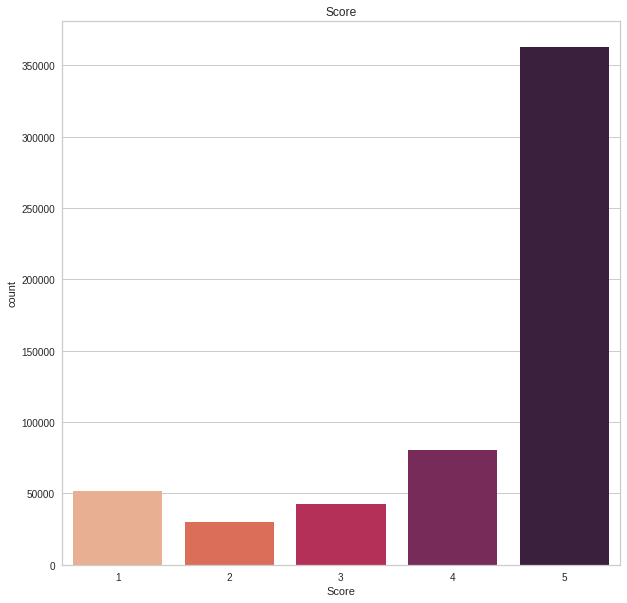

In [ ]:
# Distribution of values of Score column using a histogram
sns.countplot(data.Score, palette="rocket_r")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')

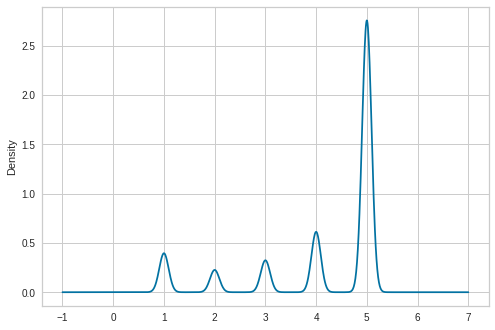

In [ ]:
# Distribution of values of Score column using a density plot
data.Score.plot.density()
plt.show()

In [ ]:
total = data["Score"].count()

distribution_perc = pd.DataFrame({"Total":data["Score"].value_counts()})
distribution_perc.reset_index(inplace = True)
distribution_perc.rename(columns={"index":"Rating"},inplace=True)

distribution_perc["Percent"] = distribution_perc["Total"].apply(lambda x: (x/total)*100)

In [ ]:
distribution_perc

Rating   Total    Percent
0       5  362684  63.900067
1       4   80598  14.200289
2       1   51988   9.159590
3       3   42575   7.501145
4       2   29735   5.238909

### Mean Length of the Review

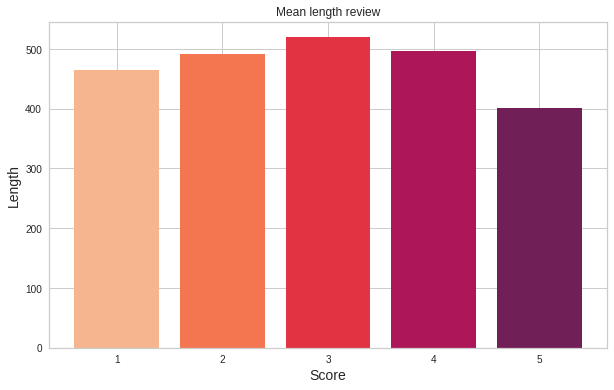

In [ ]:
# Mean length review plot
data['Txt_length'] = data['Text'].str.len()
length = data.groupby('Score')['Txt_length'].mean()

# Set the palette to the Rocket palette
sns.set_palette("rocket_r")

# Get the colors from the palette
colors = sns.color_palette()


ratings = ['1','2','3','4','5']
plt.figure(figsize = (10, 6))
plt.bar(ratings, 
        length, 
        color = colors)
plt.xlabel("Score", size = 14)
plt.ylabel("Length", size = 14)
plt.title('Mean length review')
plt.show()

### Words Statistics

Statistics about words contained in a text, in a review.

In [ ]:
data["count_words"] = data["Text"].apply(lambda n: len(str(n).split(" ")))
data[["Text","count_words"]].head()

data["count_words"].describe()

count    567580.000000
mean         81.700340
std          79.631819
min           3.000000
25%          34.000000
50%          58.000000
75%         100.000000
max        3526.000000
Name: count_words, dtype: float64

Top 20 words which appear in the Summaries and in the texts.

In [ ]:
top_words_summary =pd.Series(' '.join(data.Summary).lower().split()).value_counts()[:20]
print("Top Count Words Used In Summary\n" , top_words_summary)

Top Count Words Used In Summary
 great     66934
the       55010
good      43711
a         40069
for       39800
and       34610
not       32775
best      30545
my        28895
love      26301
but       22724
this      22318
to        20973
of        20453
i         20406
coffee    19712
is        18229
it        18125
tea       17286
very      15759
dtype: int64


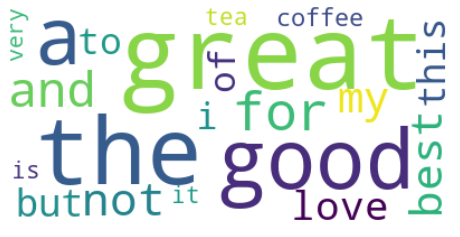

In [ ]:
wordcloud = WordCloud(background_color='white', 
                      max_words=200).generate_from_frequencies(top_words_summary)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
top_words_text =pd.Series(' '.join(data.Text).lower().split()).value_counts()[:20]
print("Top Count Words Used In Text\n" , top_words_text)

Top Count Words Used In Text
 the     1823564
i       1424493
and     1254316
a       1185439
to       998944
of       792208
it       770010
is       717905
this     631066
for      535567
in       527988
my       451147
that     410412
but      354790
with     343767
have     339366
not      317209
are      312652
was      308078
you      307456
dtype: int64


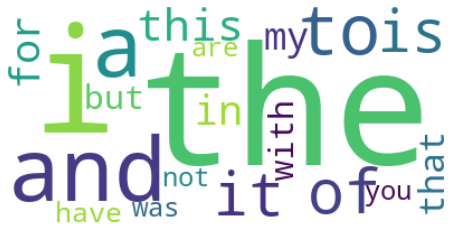

In [ ]:
wordcloud = WordCloud(background_color='white', 
                      max_words=200).generate_from_frequencies(top_words_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Mostly stop words, so we have to proceed with a preprocessing phase.

### Characters Stats

In [ ]:
#text after preprocessing
data["count_chars"] = data["Text"].apply(lambda n: len(str(n)))
data[["Text","count_chars"]].head()

data["count_chars"].describe()

count    567580.000000
mean        434.530820
std         439.066683
min          12.000000
25%         179.000000
50%         301.000000
75%         526.000000
max       21409.000000
Name: count_chars, dtype: float64

In [ ]:
#summary
data["count_chars"] = data["Summary"].apply(lambda n: len(str(n)))
data[["Summary","count_chars"]].head()

data["count_chars"].describe()

count    567580.000000
mean         23.432373
std          14.016857
min           1.000000
25%          13.000000
50%          20.000000
75%          30.000000
max         128.000000
Name: count_chars, dtype: float64

In [ ]:
data_text_summarization = data.copy()

## Balancing Data

In [ ]:
counts = data['Score'].value_counts()

# calculates the number of rows to sample (min value of counts of the classes)
samples_per_class = counts.min()

#sample data
balanced_data = data.groupby('Score', as_index=False).apply(lambda x: x.sample(samples_per_class, random_state = 1)) 
#undersampling randomly

In [ ]:
display(balanced_data) 

Id   ProductId          UserId             ProfileName  \
0 241344  241345  B001DTMIAW   AJP8W7LE8WIU9                   brian   
  372612  372613  B0083T6HC0  A1UX8ESH5KGGGE                f.dianne   
  11951    11952  B001CD1VI4   AQIX666DNUDM8               bobbersdd   
  328858  328859  B0010XV4BK  A20ZF89W9OSIFG                 Chelsea   
  105033  105034  B0028GWGYW   AC05BFHAQ63QR             iwriteplays   
...          ...         ...             ...                     ...   
4 523233  523234  B0040KXLNY  A36RPLWN7VSFZZ               Imagbarer   
  236593  236594  B008YA1NWC  A2G4ZT3R94CUH0      Kathleen Broderick   
  310755  310756  B0002XEI9O  A2BLJGGWN8GTXQ                    Sean   
  295197  295198  B000HQKRCS  A1YHB7Z6DB33Z5  J. Zimmerman "fotobug"   
  206495  206496  B0028S50S4   ADVQWM9FY5GEI             Sheriberri2   

          HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0 241344                    15                      16      1  1286668800   
  372612                     3                       3      1  1342483200   
  11951                      0                       2      1  1317081600   
  328858                     0                       0      1  1336953600   
  105033                     1                       3      1  1323216000   
...                        ...                     ...    ...         ...   
4 523233                     6                       6      5  1280275200   
  236593                     0                       0      5  1308441600   
  310755                     3                       3      5  1303344000   
  295197                     5                       5      5  1232323200   
  206495                     0                       1      5  1290556800   

                                    Summary  \
0 241344                         misleading   
  372612                          HORRIBLE.   
  11951                         Yucky taste   
  328858                     Such a mistake   
  105033  Flavor additives -- not just tea!   
...                                     ...   
4 523233                  Great TV viewing.   
  236593    best coffee from green mountain   
  310755                       Wonderful!!!   
  295197                        onion juice   
  206495                   Cacao Extra Dark   

                                                       Text  Txt_length  \
0 241344  the price says $1.21 an ounce....they ship you...         382   
  372612  HORRIBLE PRODUCT. TWO OF THEM EXPLODED. 32 OUT...         233   
  11951   The cookies tasted too much like baby food pru...         189   
  328858  I was thrilled to discover a calorie free alte...         330   
  105033  I was really excited to get this tea, as I'm t...         564   
...                                                     ...         ...   
4 523233  I have a lot of free time while I'm sitting in...         247   
  236593  as a coffee snob, this is the best coffee i ha...         260   
  310755  I bought this to try instead of using my usual...         241   
  295197  I could no longer find this in the grocery sto...         161   
  206495  All I can say is: Yummmmm !  I use it in my co...         140   

          count_words  count_chars  
0 241344           60           10  
  372612           45            9  
  11951            36           11  
  328858           55           14  
  105033          101           33  
...               ...          ...  
4 523233           50           17  
  236593           50           31  
  310755           45           12  
  295197           33           11  
  206495           31           16  

[148675 rows x 13 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

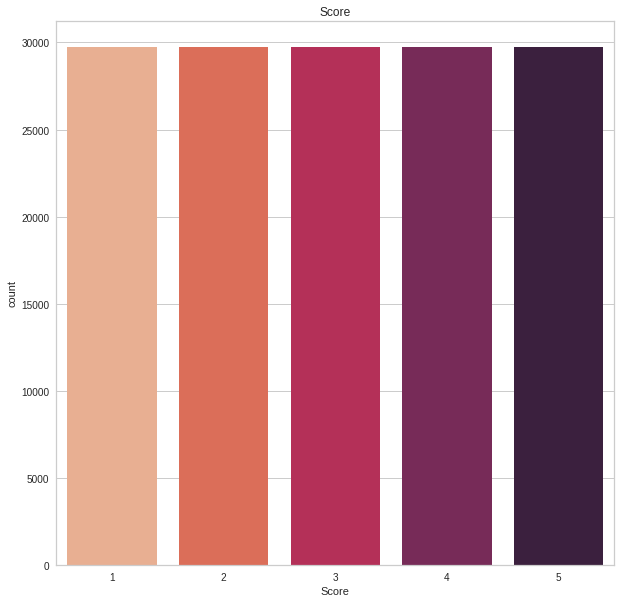

In [ ]:
# Distribution of values of Score column using a histogram
sns.countplot(balanced_data.Score, palette="rocket_r")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')

In [ ]:
total = balanced_data["Score"].count()

distribution_perc = pd.DataFrame({"Total":balanced_data["Score"].value_counts()})
distribution_perc.reset_index(inplace = True)
distribution_perc.rename(columns={"index":"Rating"},inplace=True)

distribution_perc["Percent"] = distribution_perc["Total"].apply(lambda x: (x/total)*100)

In [ ]:
distribution_perc

Rating  Total  Percent
0       1  29735     20.0
1       2  29735     20.0
2       3  29735     20.0
3       4  29735     20.0
4       5  29735     20.0

Mean Length of the Reviews after balancing score variable.

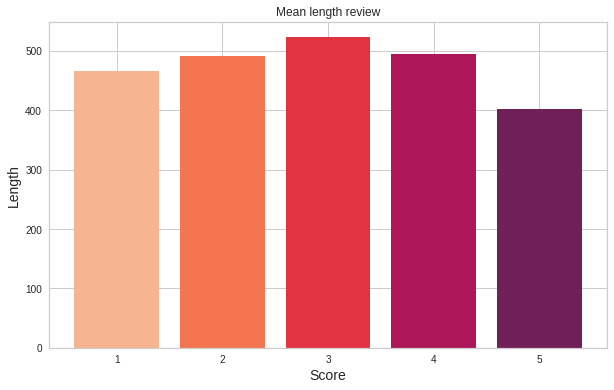

In [ ]:
# Mean length review plot
balanced_data['Txt_length'] = balanced_data['Text'].str.len()
length = balanced_data.groupby('Score')['Txt_length'].mean()

# Set the palette to the Rocket palette
sns.set_palette("rocket_r")

# Get the colors from the palette
colors = sns.color_palette()

ratings = ['1','2','3','4','5']
plt.figure(figsize = (10, 6))
plt.bar(ratings, 
        length, 
        color = colors)
plt.xlabel("Score", size = 14)
plt.ylabel("Length", size = 14)
plt.title('Mean length review')
plt.show()

## Pre-processing 


### General functions for pre-processing

In [ ]:
def remove_numbers(text): #function used to remove numbers from text 
    return re.sub(r'\d+', '', text)

def remove_links(text): #function used to remove links from text 
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)
    
def remove_num_specialchars(text): # #function used to remove special chars and numbers from text 
    return re.sub("[^A-Za-z]+", " ", text)


punctuation = string.punctuation
punctuation = punctuation.replace("'", "")
def remove_punctuation_noapex(text, punctuation=punctuation): #function used to remove punctuation excpet apexes from text
#do not remove apex because if there is "didn't." it is not read as a contraction (because of the point)
#in this way I remove the point or comma or other punctuations except for the apex so that I can recognize better contractions
  return text.translate(str.maketrans(punctuation, ' '*len(punctuation)))

def remove_punctuation_apex(text, punctuation=None): #function used to remove punctuation from text
#executed in a second moment to remove apexes and eventually punctuation symbols
  if punctuation is None:
    punctuation = string.punctuation
  return text.translate(str.maketrans(punctuation, ' '*len(punctuation)))

def remove_stopwords(text, stopwords=None): #function used to remove stopwords from text
    if stopwords is None:
        stopwords = STOPWORDS
    return ' '.join([word for word in text.split() if word not in stopwords])

def fix_contractions(text): #function used to expand contraction in the text
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
    text = " ".join(new_text)
    return text

def remove_repeated_letters(text): #function used to remove repeated letters in words from text (ex. gooooood -- good)
    pattern = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    # r’\1\1' limits all the repetition to two characters
    text_formatted = pattern.sub(r"\1\1", text) 
    # Pattern matching for all the punctuations that can occur
    pattern_punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    final_text = pattern_punct.sub(r'\1', text_formatted)
    return final_text

def lemmaSentence(token_words): #function used to lemmatize words
    lemma_text=[]
    for word in token_words:
        lemma_text.append(wordnet_lemmatizer.lemmatize(word))
    return lemma_text


#Reference: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text): #function used to remove emojis from text
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
 
def remove_whitespaces(text): #function used to remove whitespaces from text
    return " ".join(text.split())


def remove_html_tags(text): #function used to remove html tags from text
    soup = BeautifulSoup(text, "html.parser")
    new_text = soup.get_text(separator=" ")
    return new_text

Import contractions.

In [ ]:
# Contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
"didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
"he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
"mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
"this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
"we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [ ]:
# print(type(data.preprocessed.values))

In [ ]:
#nltk stopwords
STOPWORDS = set(stopwords.words('english')) #set of stopwords
# STOPWORDS.remove('not')
# STOPWORDS.remove('is')
# STOPWORDS.remove('but')

balanced_data["preprocessed"] = balanced_data.Text.str.lower() #put all characters in lower case
balanced_data.preprocessed =  balanced_data.preprocessed.apply(remove_links)
balanced_data.preprocessed =  balanced_data.preprocessed.apply(remove_html_tags)
balanced_data.preprocessed =  balanced_data.preprocessed.apply(remove_num_specialchars)
balanced_data.preprocessed = balanced_data.preprocessed.apply(remove_numbers)
balanced_data.preprocessed = balanced_data.preprocessed.apply(remove_emoji)
balanced_data.preprocessed = balanced_data.preprocessed.apply(remove_repeated_letters)
balanced_data.preprocessed =  balanced_data.preprocessed.apply(remove_punctuation_noapex) #didn't. --> didn't
balanced_data.preprocessed = balanced_data.preprocessed.apply(fix_contractions) #didn't --> did not
balanced_data.preprocessed =  balanced_data.preprocessed.apply(remove_punctuation_apex) #remove apex
balanced_data.preprocessed = balanced_data.preprocessed.apply(remove_whitespaces)

#Stop words removal
balanced_data.preprocessed = balanced_data.preprocessed.apply(remove_stopwords)

#tokenization
balanced_data["tokens"] = balanced_data.preprocessed.str.split()

#alternative way
# Word tokenizer
#from nltk.tokenize import wordpunct_tokenize
#print(wordpunct_tokenize(balanced_data.preprocessed))



#lemmatization
balanced_data["lemma"] = balanced_data.tokens.apply(lemmaSentence) #nltk lemmatization

In [ ]:
balanced_data["text_preproc"] = balanced_data.lemma.copy()
#join all lemmatized words of a particular text in order to have a unique string (which is the text) and not a list of strings (every string is a word)
balanced_data["text_preproc"] = balanced_data["text_preproc"].apply(lambda x: ' '.join(x)) 

balanced_data.head(20)

Id   ProductId          UserId       ProfileName  \
0 241344  241345  B001DTMIAW   AJP8W7LE8WIU9             brian   
  372612  372613  B0083T6HC0  A1UX8ESH5KGGGE          f.dianne   
  11951    11952  B001CD1VI4   AQIX666DNUDM8         bobbersdd   
  328858  328859  B0010XV4BK  A20ZF89W9OSIFG           Chelsea   
  105033  105034  B0028GWGYW   AC05BFHAQ63QR       iwriteplays   
  148923  148924  B004Q3LBTG  A1ZXCR0HNBG8FT           DecMama   
  457985  457986  B002OCNB8U   A3S5KF1462KAP   D. Daniel Boone   
  463488  463489  B000GW67KY  A3SYL423X4ZTAG  Brea Hasselbring   
  177648  177649  B003561V40   AOK9CW62NSJXA       Jennie Leah   
  107408  107409  B005DFL4PM   ANNDJBVT8B8Q4          W. Petta   
  552476  552477  B002OG1L4W  A2TN9C5E4A0I3F             Jimmy   
  417922  417923  B009RB4GO4  A1YEADNW6J6SGY          M. Lange   
  391444  391445  B000HQNJHI  A2DU53YPHSTNEP       Neva M. Alf   
  180606  180607  B001JP7G2A  A15ZV2BO2LLMT7        R. Luciano   
  216733  216734  B000Q92QIE   ACGB8QG1ZGRTC    Jonathan Shook   
  10343    10344  B003EML8PM  A224BOQUVNBOYB       Alice in AZ   
  414053  414054  B0026KPDG8  A3NKQ6NPDL9J7Q            Y. You   
  164360  164361  B002915VF2   AW3NJCL5PKRS0            C. Luk   
  288157  288158  B000FCG8XG   AEXB3Y44PKPGS          G. Green   
  53293    53294  B00370ESNU   AGH6BM0PAE8RS   Dr Pepper Lover   

          HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0 241344                    15                      16      1  1286668800   
  372612                     3                       3      1  1342483200   
  11951                      0                       2      1  1317081600   
  328858                     0                       0      1  1336953600   
  105033                     1                       3      1  1323216000   
  148923                     1                       2      1  1338681600   
  457985                     8                      11      1  1326067200   
  463488                     1                       1      1  1311120000   
  177648                     3                       9      1  1329004800   
  107408                     0                       0      1  1349136000   
  552476                     0                       1      1  1335744000   
  417922                     1                       2      1  1322438400   
  391444                     0                       0      1  1241049600   
  180606                     3                       3      1  1316649600   
  216733                     7                      13      1  1281830400   
  10343                      5                       7      1  1305072000   
  414053                     1                       7      1  1284508800   
  164360                     0                       0      1  1336089600   
  288157                     4                       4      1  1200009600   
  53293                      0                       0      1  1313366400   

                                                    Summary  \
0 241344                                         misleading   
  372612                                          HORRIBLE.   
  11951                                         Yucky taste   
  328858                                     Such a mistake   
  105033                  Flavor additives -- not just tea!   
  148923                                 Do not buy this!!!   
  457985  Not an EXTRACT - it's artificial vanilla FLAVO...   
  463488                                             Moldy!   
  177648                                     Not ecological   
  107408                Not as Flavorful as the regular PB2   
  552476                        Dry, overly chewy and bland   
  417922                                               Yuk!   
  391444                                      Taste-T-Picks   
  180606                    1 mile HA can't charge 100 feet   
  216733                                FIRE & SMOKE HAZARD   
 

### Histograms

Length of the Summaries with frequency of that length.

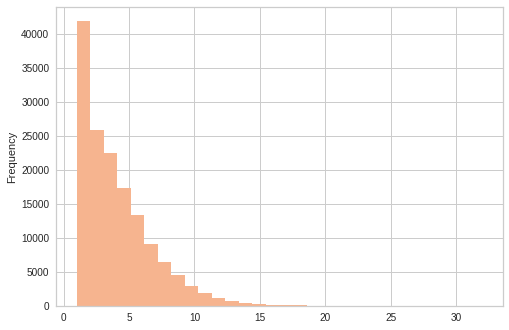

In [ ]:
balanced_data.Summary.apply(lambda x:len(x.split(' '))).plot(kind='hist', bins=30)

Length of the Texts with frequency of that length.

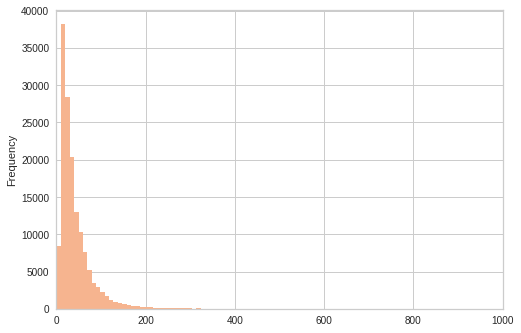

In [ ]:
balanced_data.text_preproc.apply(lambda x:len(x.split(' '))).plot(kind='hist', bins=200, xlim=(0, 1000))

### Words Statistics After Pre-processing

Statistics about words contained in a text, in a review.

In [ ]:
balanced_data["count_words"] = balanced_data["text_preproc"].apply(lambda n: len(str(n).split(" ")))
balanced_data[["text_preproc","count_words"]].head()

balanced_data["count_words"].describe()

count    148675.000000
mean         42.349965
std          41.401745
min           1.000000
25%          18.000000
50%          30.000000
75%          52.000000
max        1956.000000
Name: count_words, dtype: float64

In [ ]:
balanced_data["count_words"] = balanced_data["Summary"].apply(lambda n: len(str(n).split(" ")))
balanced_data[["Summary","count_words"]].head()

balanced_data["count_words"].describe()

count    148675.000000
mean          4.385122
std           2.756634
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          32.000000
Name: count_words, dtype: float64

Top 20 words which appear in the summaries and in the texts.

In [ ]:
top_words_summary =pd.Series(' '.join(balanced_data.Summary).lower().split()).value_counts()[:20]
print("Top Count Words Used In Summary\n" , top_words_summary)

Top Count Words Used In Summary
 not       19438
the       14594
good      12726
a         11652
but       10931
great     10578
for        9987
and        8214
to         6412
i          6156
of         6092
my         6069
it         5842
is         5700
this       5313
taste      4996
like       4995
very       4597
too        4563
coffee     4455
dtype: int64


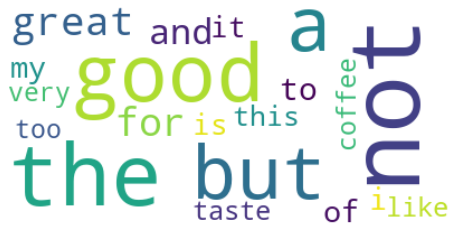

In [ ]:
wordcloud = WordCloud(background_color='white', 
                      max_words=200).generate_from_frequencies(top_words_summary)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
top_words_text = pd.Series(' '.join(balanced_data.text_preproc).lower().split()).value_counts()[:20]
print("Top Count Words Used In Text\n" , top_words_text)

Top Count Words Used In Text
 like       83122
taste      70097
product    58253
flavor     55137
good       55049
one        54319
coffee     51966
would      43386
tea        38530
food       38244
get        33233
great      30677
love       30456
dog        29349
really     28876
much       27695
time       26864
make       26858
cup        25622
bag        25562
dtype: int64


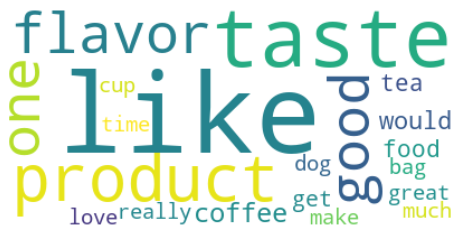

In [ ]:
wordcloud = WordCloud(background_color='white', 
                      max_words=200).generate_from_frequencies(top_words_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Characters Stats After Pre-processing

In [ ]:
#text after preprocessing
balanced_data["count_chars"] = balanced_data["text_preproc"].apply(lambda n: len(str(n)))
balanced_data[["text_preproc","count_chars"]].head()

balanced_data["count_chars"].describe()

count    148675.000000
mean        274.878621
std         276.105945
min           0.000000
25%         113.000000
50%         194.000000
75%         337.000000
max       14362.000000
Name: count_chars, dtype: float64

In [ ]:
#summary
balanced_data["count_chars"] = balanced_data["Summary"].apply(lambda n: len(str(n)))
balanced_data[["Summary","count_chars"]].head()

balanced_data["count_chars"].describe()

count    148675.000000
mean         24.549521
std          14.701260
min           1.000000
25%          14.000000
50%          21.000000
75%          32.000000
max         128.000000
Name: count_chars, dtype: float64

## Text representation
Choose suitable representation(s) and explain the rationale behind
this choice

- BoW (binary, tf, tf-idf)

- Word Embeddings (word2vec, Glove, etc.)

- Contextual Word Embeddings (BERT, …)

#### TF-IDF

We decided to use tf-idf for text representation. We will perform a knn clustering.

##### Sample

In [ ]:
#make a sample of data, keep 15% of the original dataset and keep the class score balanced
data_sample = balanced_data.groupby('Score', group_keys=True).apply(lambda x: x.sample(frac=0.15, 
                                                                                       random_state = 1))

In [ ]:
class_counts = data_sample['Score'].value_counts()
class_counts

1    4460
2    4460
3    4460
4    4460
5    4460
Name: Score, dtype: int64

##### TF-IDF

In [ ]:
tf_idf_vect = TfidfVectorizer(min_df=5, ngram_range = (1,2), max_features = 8000)
final_tf_idf_100 = tf_idf_vect.fit_transform(data_sample.text_preproc)
print("shape", final_tf_idf_100.get_shape())
print("number of unique words with uni and bi gram", final_tf_idf_100.get_shape()[1])

shape (22300, 8000)
number of unique words with uni and bi gram 8000


##### NOT USED Bag Of Words

In [ ]:
# count_vect = CountVectorizer(max_features=8000)
# binary_bow_data = count_vect.fit_transform(data_sample.text_preproc)

In [ ]:
# final_bow_np = StandardScaler(with_mean=False).fit_transform(binary_bow_data)

## SVD Dimensionality Reduction

In [ ]:
svd = TruncatedSVD(n_components=300, n_iter = 100)
svd_red = svd.fit_transform(final_tf_idf_100) 
scatter_x = svd_red[:, 0]
scatter_y = svd_red[:, 1]

In [ ]:
path2 = '/content/drive/MyDrive/ProgettiDataScience-SAD/2ANNO1SEMESTRE/TEXT MINING AND SEARCH/Merlo847203_SanvitoS844794/svd_red.npy'
np.save(path2, svd_red)

In [ ]:
svd_red = np.load(path2)

## Text Clustering


##### Functions for scoring performances

In [ ]:
def score_clustering(true_labels, predicted_labels):
  d = {
      "Rand index": rand_score(true_labels, predicted_labels),
      "Adjusted Mutual Info": adjusted_mutual_info_score(true_labels, predicted_labels),
      "Homogeneity": homogeneity_score(true_labels, predicted_labels),
      "Completeness": completeness_score(true_labels, predicted_labels),
      "V measure": v_measure_score(true_labels, predicted_labels),
      "Fowlkes Mallows": fowlkes_mallows_score(true_labels, predicted_labels)
      }
  for k, v in d.items():
    print(f"{k:21s}: {v}")

In [ ]:
def evaluate_clustering_unsup(X, labels):
  u = {
  "Silhouette": silhouette_score(X, labels),
  "Calinski Harabasz": calinski_harabasz_score(X, labels),
  "Davies Bouldin": davies_bouldin_score(X, labels)
  }
  for k, v in u.items():
    print(f"{k:21s}: {v}")

#### Optimal Number of Clusters

##### Elbow Method 1 - Silhouette

Perform Elbow Method to find optimal number of clusters.

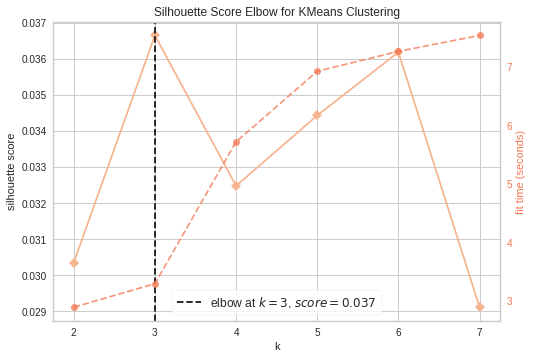

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette')

visualizer.fit(svd_red)
visualizer.show()

optimal_number1 = visualizer.elbow_value_

##### Elbow Method 2 - Distortion

Perform Elbow Method to find optimal number of clusters.

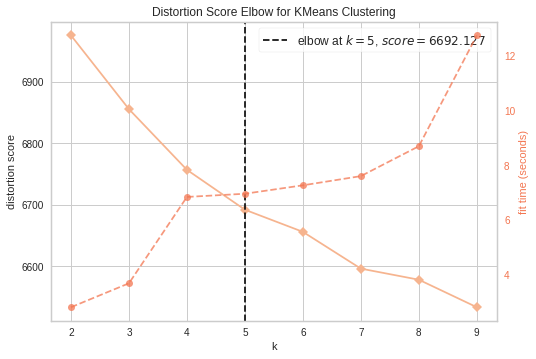

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')

visualizer.fit(svd_red)
visualizer.show()

optimal_number2 = visualizer.elbow_value_

### K-Means

Perform Clustering with K-Means Method.

#### K-Means with Elbow Method 1 Silhouette

In [ ]:
#with elbow method 1

# initialize kmeans with optimal_number1 centroids
kmeans_elbow1 = KMeans(n_clusters=optimal_number1, random_state=1)
# fit the model
kmeans_elbow1.fit(svd_red)
# store cluster labels in a variable
clusters1 = kmeans_elbow1.labels_
labels1 = kmeans_elbow1.predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, labels1)
print("Number of clusters", optimal_number1)

Rand index           : 0.3805860666196497
Adjusted Mutual Info : 0.0028985550815879483
Homogeneity          : 0.00207748638809359
Completeness         : 0.0058234942457848085
V measure            : 0.0030624628985631524
Fowlkes Mallows      : 0.37458145035339335
Number of clusters 3


In [ ]:
evaluate_clustering_unsup(svd_red, labels1)
print("Number of clusters", optimal_number1)

Silhouette           : 0.036648145448554284
Calinski Harabasz    : 422.5386313024555
Davies Bouldin       : 3.9918406894848406
Number of clusters 3


##### Visualization of the results with SVD


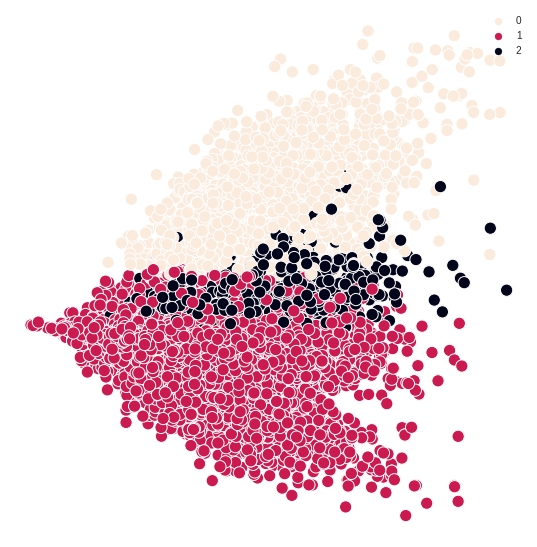

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=clusters1, palette="rocket_r", s=150)
plt.tight_layout()
plt.axis('off')
plt.show()

##### WordCloud

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster numero: 0


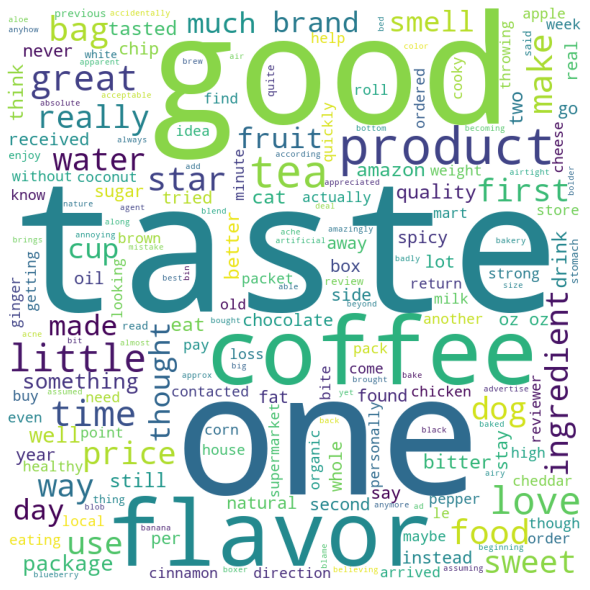

Cluster numero: 1


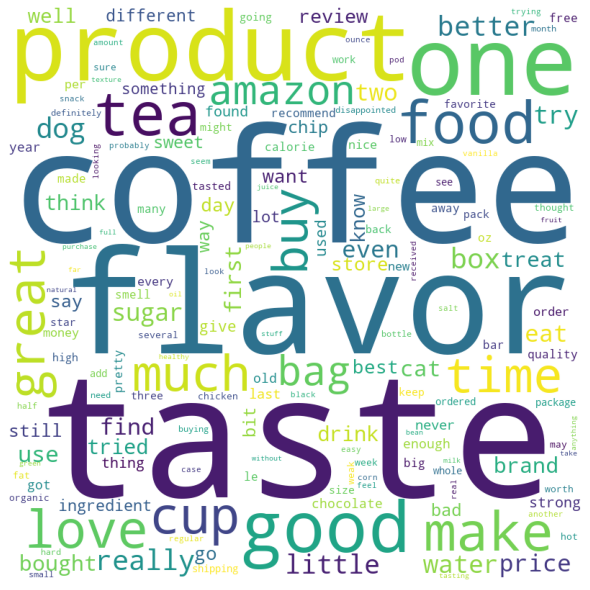

Cluster numero: 2


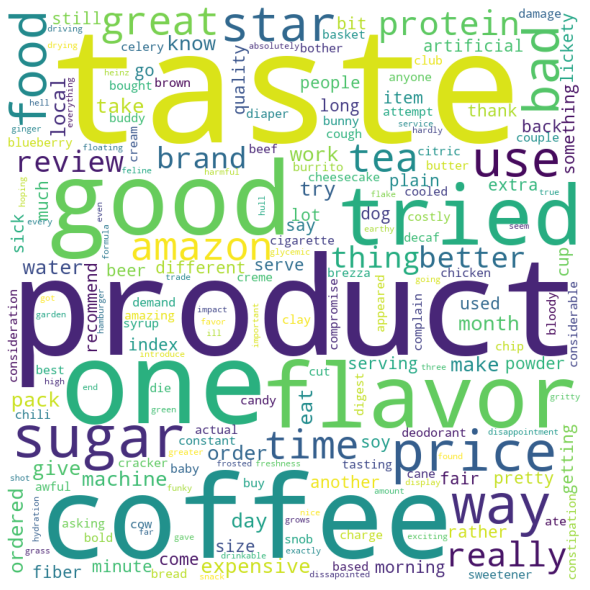

In [ ]:
# Get the list of terms
terms = tf_idf_vect.get_feature_names()

# Create a dictionary to store the cluster labels and the corresponding terms
cluster_terms = {}

# Iterate over the clusters and terms
for cluster in range(optimal_number1):
    cluster_terms[cluster] = [terms[i] for i in range(len(terms)) if labels1[i] == cluster]

# Create a wordcloud for each cluster
for cluster in range(optimal_number1):
    print("Cluster numero:", cluster)
    wordcloud = WordCloud(width=800, height=800, background_color ='white', min_font_size = 10).generate(', '.join(cluster_terms[cluster]))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

##### Confusion Matrix

[[ 389 3884  187]
 [ 517 3642  301]
 [ 605 3616  239]
 [ 556 3600  304]
 [ 410 3694  356]]


Text(51.0, 0.5, 'Score')

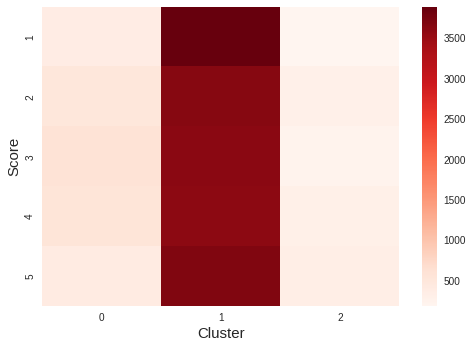

In [ ]:
clusters11 = clusters1 + 1 
cm2 = confusion_matrix(data_sample.Score, clusters11)
cm2 = np.delete(cm2, [3,4], 1)
print(cm2)
ax=sns.heatmap(cm2,
               cmap='Reds',
               xticklabels=["0","1", "2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

More or less all the values are concentrated in only one cluster, this is why performances are so bad.

###### NOT USED t-sne

In [ ]:
# tsne = TSNE(n_components=2, init='random', learning_rate='auto')
# dt_tsne = tsne.fit_transform(svd_red) 
# scatter_x_tsne = dt_tsne[:, 0]
# scatter_y_tsne = dt_tsne[:, 1]

In [ ]:
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x = scatter_x_tsne, y=scatter_y_tsne, hue=clusters1, palette="rocket_r", s=150)
# plt.tight_layout()
# plt.axis('off')
# plt.show()

###### NOT USED PCA

In [ ]:
# # https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7

# # initialize PCA with 2 components
# pca = PCA(n_components=2, random_state=42)
# # pass our X to the pca and store the reduced vectors into pca_vecs
# pca_vecs = pca.fit_transform(svd_red)
# # save our two dimensions into x0 and x1
# x0 = pca_vecs[:, 0]
# x1 = pca_vecs[:, 1]

In [ ]:
# data_sample['cluster'] = clusters1
# data_sample['x0'] = x0
# data_sample['x1'] = x1

In [ ]:
# # set image size
# plt.figure(figsize=(12, 7))
# # set a title
# plt.title("TF-IDF + SVD + PCA + KMeans clustering", fontdict={"fontsize": 18})
# # set axes names
# plt.xlabel("X0", fontdict={"fontsize": 16})
# plt.ylabel("X1", fontdict={"fontsize": 16})
# # create scatter plot with seaborn, where hue is the class used to group the data
# sns.scatterplot(data=data_sample, x='x0', y='x1', hue='cluster', palette="viridis")
# plt.show()

In [ ]:
# def get_top_keywords_wordcloud(n_terms):
#     """This function returns the keywords for each centroid of the KMeans"""
#     df = pd.DataFrame(final_tf_idf_100.todense()).groupby(clusters1).mean() # groups the TF-IDF vector by cluster
#     terms = tf_idf_vect.get_feature_names_out() # access tf-idf terms
#     for i,r in df.iterrows():
#         print('\nCluster {}'.format(i))
#         top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
#         print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
#         wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
#         plt.figure()
#         plt.imshow(wordcloud, interpolation="bilinear")
#         plt.axis("off")
#         plt.show()

In [ ]:
# get_top_keywords_wordcloud(20)

#### K-Means with Elbow Method 2 Distortion

In [ ]:
#with elbow method 2

# initialize kmeans with 3 centroids
kmeans_elbow2 = KMeans(n_clusters=optimal_number2, random_state=1)
# fit the model
kmeans_elbow2.fit(svd_red)
# store cluster labels in a variable
clusters2 = kmeans_elbow2.labels_
labels2 = kmeans_elbow2.predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, labels2)
print("Number of clusters", optimal_number2)

Rand index           : 0.4690558425572383
Adjusted Mutual Info : 0.0026645465947149434
Homogeneity          : 0.002331639741122631
Completeness         : 0.0039985272192034306
V measure            : 0.002945617399568574
Fowlkes Mallows      : 0.33278845761761544
Number of clusters 5


In [ ]:
evaluate_clustering_unsup(svd_red, labels2)
print("Number of clusters", optimal_number2)

Silhouette           : 0.03442988052659058
Calinski Harabasz    : 352.3658491043245
Davies Bouldin       : 3.854574429053276
Number of clusters 5


##### Visualization of the results with SVD


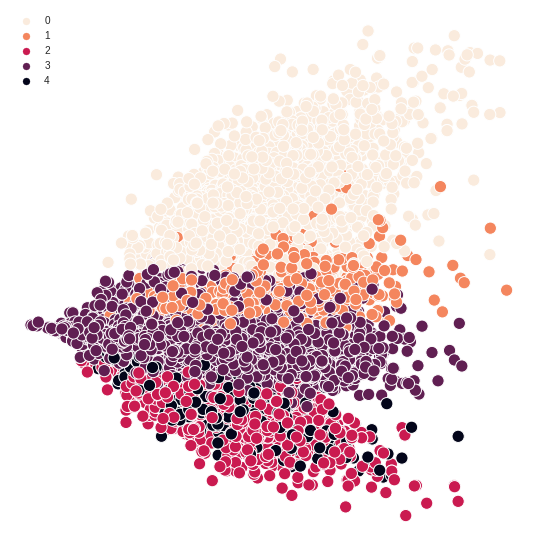

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=clusters2, palette="rocket_r", s=150)
plt.tight_layout()
plt.axis('off')
plt.show()

##### WordCloud

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster numero: 0


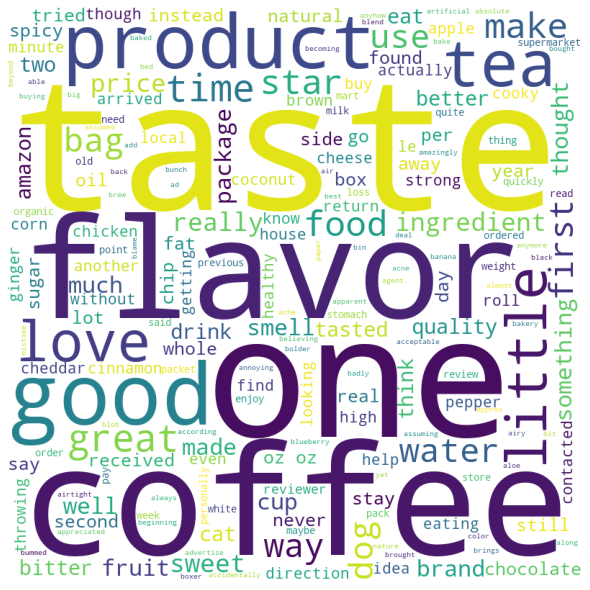

Cluster numero: 1


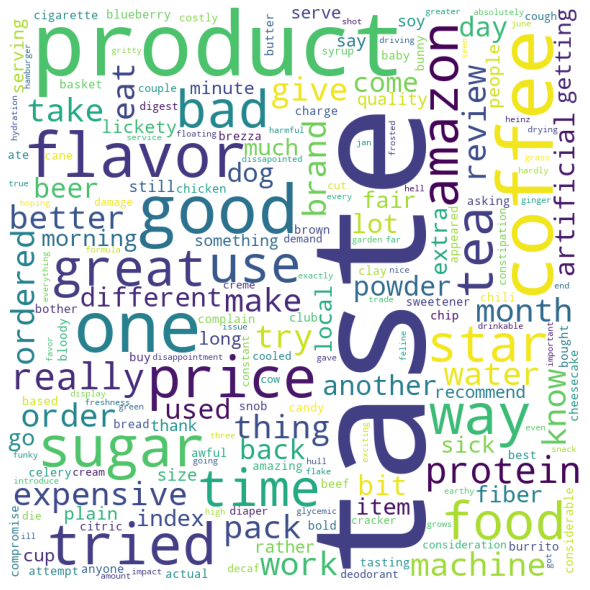

Cluster numero: 2


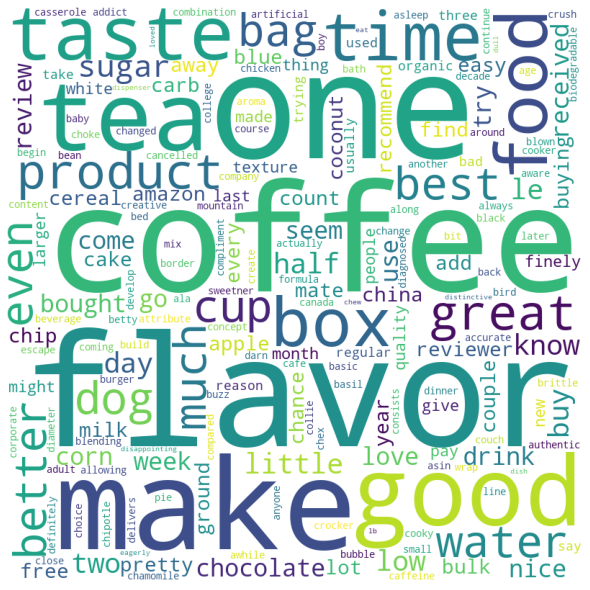

Cluster numero: 3


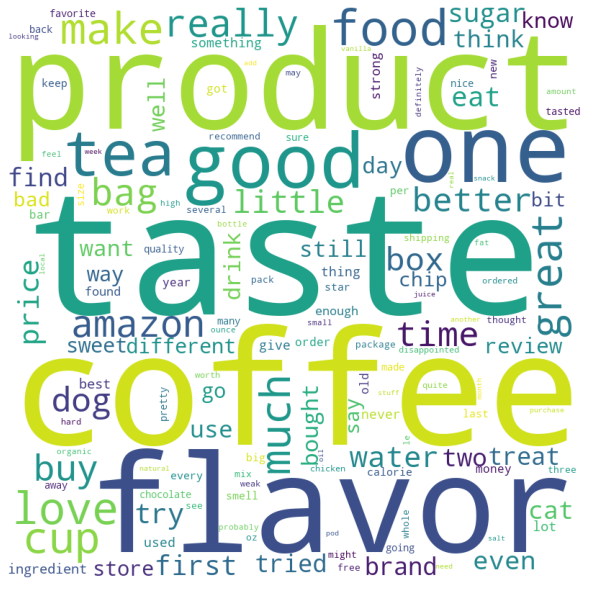

Cluster numero: 4


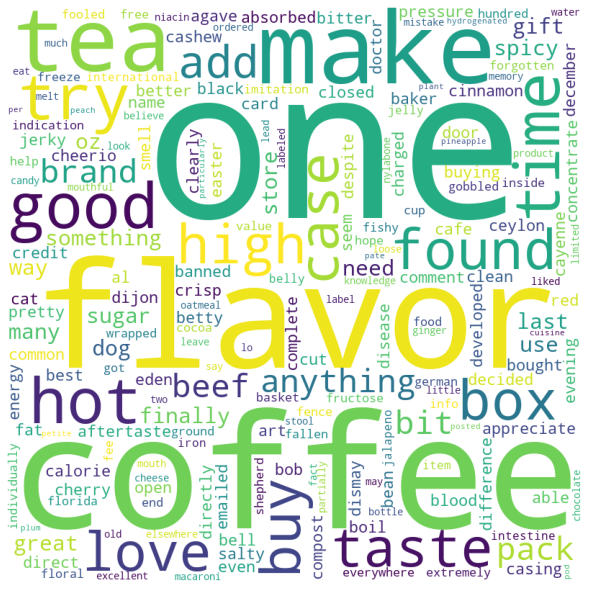

In [ ]:
# Get the list of terms
terms = tf_idf_vect.get_feature_names()

# Create a dictionary to store the cluster labels and the corresponding terms
cluster_terms = {}

# Iterate over the clusters and terms
for cluster in range(optimal_number2):
    cluster_terms[cluster] = [terms[i] for i in range(len(terms)) if labels2[i] == cluster]

# Create a wordcloud for each cluster
for cluster in range(optimal_number2):
    print("Cluster numero:", cluster)
    wordcloud = WordCloud(width=800, height=800, background_color ='white', min_font_size = 10).generate(', '.join(cluster_terms[cluster]))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

##### Confusion Matrix

[[ 381  184  334 3414  147]
 [ 510  298  275 3239  138]
 [ 602  237  297 3187  137]
 [ 549  300  280 3204  127]
 [ 403  354  330 3201  172]]


Text(51.0, 0.5, 'Score')

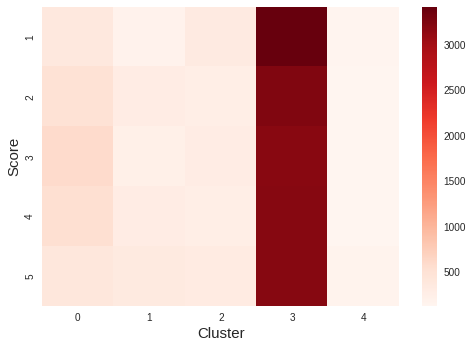

In [ ]:
clusters22 = clusters2 + 1
cm5 = confusion_matrix(data_sample.Score, clusters22)
# cm5 = np.delete(cm5, [5], 1)
print(cm5)
ax=sns.heatmap(cm5,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

### Hierarchical Clustering

linkage parameter:
- **complete**: Complete linkage
- **single**: Single linkage

affinity parameter:
- **euclidean**: Euclidean distance
- **manhattan**: Manhattan distance


#### Single + Euclidean
Single to identify clusters with a small number of samples.

##### Hierarchical with Elbow Method 1 Silhouette

In [ ]:
clustering_algorithm_se = AgglomerativeClustering(n_clusters=optimal_number1, 
                                               linkage = 'single',
                                               affinity = 'euclidean')

# Fit the clustering algorithm 
h1_cluster_se = clustering_algorithm_se.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h1_cluster_se)
print("Number of clusters", optimal_number1)

Rand index           : 0.20007175611848507
Adjusted Mutual Info : -2.4979147662586092e-09
Homogeneity          : 8.968984737299674e-05
Completeness         : 0.14615526329622033
V measure            : 0.00017926968385606013
Fowlkes Mallows      : 0.44713337511664125
Number of clusters 3


In [ ]:
evaluate_clustering_unsup(svd_red, h1_cluster_se)
print("Number of clusters", optimal_number1)

Silhouette           : 0.255393655690853
Calinski Harabasz    : 2.680005475824035
Davies Bouldin       : 0.6054405035078932
Number of clusters 3


###### Confusion Matrix

[[4460    0    0]
 [4460    0    0]
 [4459    1    0]
 [4460    0    0]
 [4459    0    1]]


Text(51.0, 0.5, 'Score')

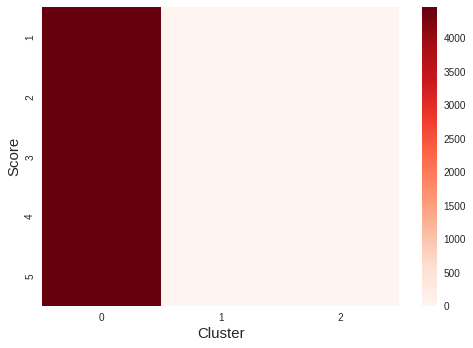

In [ ]:
h1_cluster_se1 = h1_cluster_se + 1 
cm_se2 = confusion_matrix(data_sample.Score, h1_cluster_se1)
cm_se2 = np.delete(cm_se2, [3,4], 1)
print(cm_se2)
ax=sns.heatmap(cm_se2,
               cmap='Reds',
               xticklabels=["0","1","2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

##### Hierarchical with Elbow Method 2 Distortion

In [ ]:
clustering_algorithm_se2 = AgglomerativeClustering(n_clusters=optimal_number2, 
                                               linkage = 'single',
                                               affinity = 'euclidean')

# Fit the clustering algorithm to your data
h2_cluster_se = clustering_algorithm_se2.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h2_cluster_se)
print("Number of clusters", optimal_number2)

Rand index           : 0.2001793802412664
Adjusted Mutual Info : -2.495045953185659e-09
Homogeneity          : 0.00017938094513888361
Completeness         : 0.14615687731046204
V measure            : 0.00035832211514804215
Fowlkes Mallows      : 0.44709326897371504
Number of clusters 5


In [ ]:
evaluate_clustering_unsup(svd_red, h2_cluster_se)
print("Number of clusters", optimal_number2)

Silhouette           : 0.1903253114474573
Calinski Harabasz    : 2.4435350798822237
Davies Bouldin       : 0.6457318340043353
Number of clusters 5


###### Confusion Matrix

[[4460    0    0    0    0]
 [4460    0    0    0    0]
 [4458    0    0    1    1]
 [4459    1    0    0    0]
 [4459    0    1    0    0]]


Text(51.0, 0.5, 'Score')

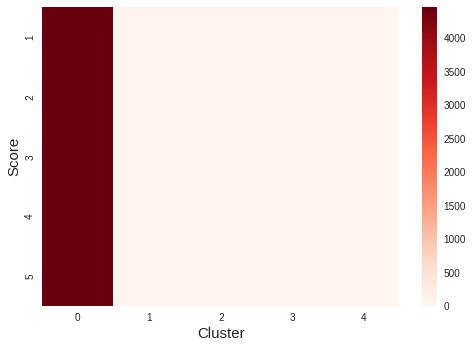

In [ ]:
h2_cluster_se1 = h2_cluster_se + 1 
cm5_se = confusion_matrix(data_sample.Score, h2_cluster_se1)
print(cm5_se)
ax=sns.heatmap(cm5_se,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

More evident the fact that all values are associated to a single cluster.

#### Single + Manhattan
Single to identify clusters with a small number of samples.

##### Hierarchical with Elbow Method 1 Silhouette

In [ ]:
clustering_algorithm_sm = AgglomerativeClustering(n_clusters=optimal_number1, 
                                               linkage = 'single',
                                               affinity = 'manhattan')

# Fit the clustering algorithm to your data
h1_cluster_sm = clustering_algorithm_sm.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h1_cluster_sm)
print("Number of clusters", optimal_number1)

Rand index           : 0.20007176416244207
Adjusted Mutual Info : 9.99388070509622e-09
Homogeneity          : 8.969609598319609e-05
Completeness         : 0.14616544580065838
V measure            : 0.00017928217341210006
Fowlkes Mallows      : 0.4471333841116721
Number of clusters 3


In [ ]:
evaluate_clustering_unsup(svd_red, h1_cluster_sm)
print("Number of clusters", optimal_number1)

Silhouette           : 0.2329041959323759
Calinski Harabasz    : 2.494536101106548
Davies Bouldin       : 0.629574056148154
Number of clusters 3


###### Confusion Matrix

[[4460    0    0]
 [4460    0    0]
 [4458    1    1]
 [4460    0    0]
 [4460    0    0]]


Text(51.0, 0.5, 'Score')

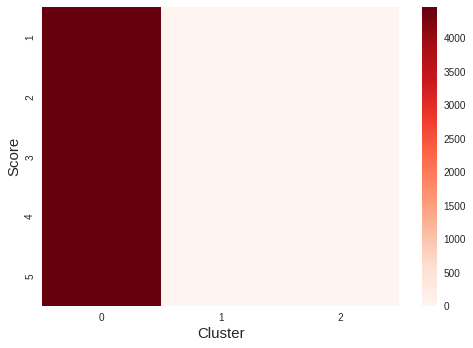

In [ ]:
h1_cluster_sm1 = h1_cluster_sm + 1 
cm_sm2 = confusion_matrix(data_sample.Score, h1_cluster_sm1)
cm_sm2 = np.delete(cm_sm2, [3,4], 1)
print(cm_sm2)
ax=sns.heatmap(cm_sm2,
               cmap='Reds',
               xticklabels=["0","1","2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

##### Hierarchical with Elbow Method 2 Distortion

In [ ]:
clustering_algorithm_sm2 = AgglomerativeClustering(n_clusters=optimal_number2, 
                                               linkage = 'single',
                                               affinity = 'manhattan')

# Fit the clustering algorithm to your data
h2_cluster_sm = clustering_algorithm_sm2.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h2_cluster_sm)
print("Number of clusters", optimal_number2)

Rand index           : 0.20017939632918044
Adjusted Mutual Info : 2.2480505810015075e-08
Homogeneity          : 0.00017939344376106627
Completeness         : 0.14616706099852034
V measure            : 0.00035834708175045056
Fowlkes Mallows      : 0.4470932869653904
Number of clusters 5


In [ ]:
evaluate_clustering_unsup(svd_red, h2_cluster_sm)
print("Number of clusters", optimal_number2)

Silhouette           : 0.20050118408686166
Calinski Harabasz    : 2.4661377909092064
Davies Bouldin       : 0.6397649061453539
Number of clusters 5


###### Confusion Matrix

[[4460    0    0    0    0]
 [4460    0    0    0    0]
 [4457    0    1    1    1]
 [4460    0    0    0    0]
 [4459    1    0    0    0]]


Text(51.0, 0.5, 'Score')

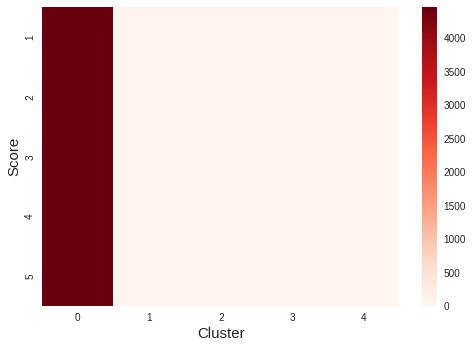

In [ ]:
h2_cluster_sm1 = h2_cluster_sm + 1 
cm5_sm = confusion_matrix(data_sample.Score, h2_cluster_sm1)
print(cm5_sm)
ax=sns.heatmap(cm5_sm,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

More evident the fact that all values are associated to a single cluster.

#### Complete + Euclidean

Complete to identify clusters with a large number of samples.


##### Hierarchical with Elbow Method 1 Silhouette

In [ ]:
clustering_algorithm_ce = AgglomerativeClustering(n_clusters=optimal_number1, 
                                               linkage = 'complete',
                                               affinity = 'euclidean')

# Fit the clustering algorithm to your data
h1_cluster_ce = clustering_algorithm_ce.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h1_cluster_ce)
print("Number of clusters", optimal_number1)

Rand index           : 0.20007175611848507
Adjusted Mutual Info : -2.4979147662586092e-09
Homogeneity          : 8.968984737299674e-05
Completeness         : 0.14615526329622033
V measure            : 0.00017926968385606013
Fowlkes Mallows      : 0.44713337511664125
Number of clusters 3


In [ ]:
evaluate_clustering_unsup(svd_red, h1_cluster_ce)
print("Number of clusters", optimal_number1)

Silhouette           : 0.255393655690853
Calinski Harabasz    : 2.680005475824035
Davies Bouldin       : 0.6054405035078932
Number of clusters 3


###### Confusion Matrix

[[4460    0    0]
 [4460    0    0]
 [4459    0    1]
 [4460    0    0]
 [4459    1    0]]


Text(51.0, 0.5, 'Score')

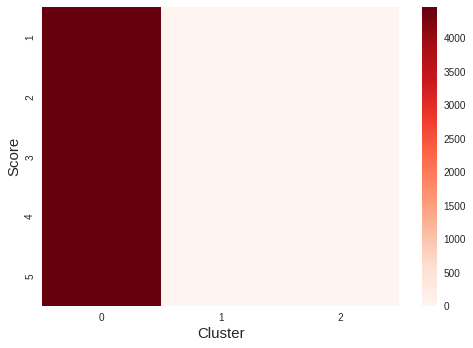

In [ ]:
h1_cluster_ce1 = h1_cluster_ce + 1 
cm_ce2 = confusion_matrix(data_sample.Score, h1_cluster_ce1)
cm_ce2 = np.delete(cm_ce2, [3,4], 1)
print(cm_ce2)
ax=sns.heatmap(cm_ce2,
               cmap='Reds',
               xticklabels=["0","1","2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

##### Hierarchical with Elbow Method 2 Distortion

In [ ]:
clustering_algorithm_ce2 = AgglomerativeClustering(n_clusters=optimal_number2, 
                                               linkage = 'complete',
                                               affinity = 'euclidean')

# Fit the clustering algorithm to your data
h2_cluster_ce = clustering_algorithm_ce2.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h2_cluster_ce)
print("Number of clusters", optimal_number2)

Rand index           : 0.22329645380144336
Adjusted Mutual Info : 0.00020263228550918631
Homogeneity          : 0.00030993636474688365
Completeness         : 0.004495599921289931
V measure            : 0.0005798936118782657
Fowlkes Mallows      : 0.43839973225078316
Number of clusters 5


In [ ]:
evaluate_clustering_unsup(svd_red, h2_cluster_ce)
print("Number of clusters", optimal_number2)

Silhouette           : 0.04047799992090544
Calinski Harabasz    : 33.23358463850883
Davies Bouldin       : 2.4481906951630306
Number of clusters 5


###### Confusion Matrix

[[4398   35    0    0   27]
 [4367   49    0    0   44]
 [4374   52    1    0   33]
 [4365   62    0    0   33]
 [4356   58    0    1   45]]


Text(51.0, 0.5, 'Score')

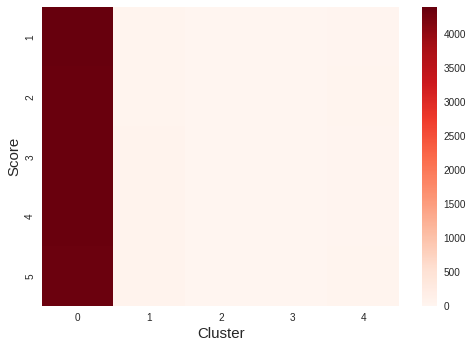

In [ ]:
h2_cluster_ce1 = h2_cluster_ce + 1 
cm5_ce = confusion_matrix(data_sample.Score, h2_cluster_ce1)
print(cm5_ce)
ax=sns.heatmap(cm5_ce,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

#### Complete + Manhattan

Complete to identify clusters with a large number of samples.


##### Hierarchical with Elbow Method 1 Silhouette

In [ ]:
clustering_algorithm_cm = AgglomerativeClustering(n_clusters=optimal_number1, 
                                               linkage = 'complete',
                                               affinity = 'manhattan')

# Fit the clustering algorithm to your data
h1_cluster_cm = clustering_algorithm_cm.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h1_cluster_cm)
print("Number of clusters", optimal_number1)

Rand index           : 0.30983333926575163
Adjusted Mutual Info : 0.0003822330555385978
Homogeneity          : 0.00034463854132677765
Completeness         : 0.001580614903161489
V measure            : 0.0005658899779501331
Fowlkes Mallows      : 0.40421479354034523
Number of clusters 3


In [ ]:
evaluate_clustering_unsup(svd_red, h1_cluster_cm)
print("Number of clusters", optimal_number1)

Silhouette           : 0.02367683328185287
Calinski Harabasz    : 37.62239604794123
Davies Bouldin       : 9.986655844140158
Number of clusters 3


###### Confusion Matrix

[[  33 4056  371]
 [  38 3990  432]
 [  28 4028  404]
 [  22 3971  467]
 [  17 3999  444]]


Text(51.0, 0.5, 'Score')

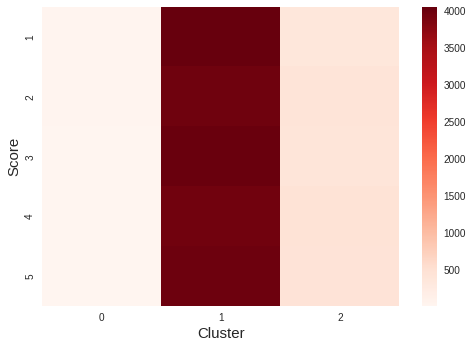

In [ ]:
h1_cluster_cm1 = h1_cluster_cm + 1 
cm_cm2 = confusion_matrix(data_sample.Score, h1_cluster_cm1)
cm_cm2 = np.delete(cm_cm2, [3,4], 1)
print(cm_cm2)
ax=sns.heatmap(cm_cm2,
               cmap='Reds',
               xticklabels=["0","1","2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

##### Hierarchical with Elbow Method 2 Distortion

In [ ]:
clustering_algorithm_cm2 = AgglomerativeClustering(n_clusters=optimal_number2, 
                                               linkage = 'complete',
                                               affinity = 'manhattan')

# Fit the clustering algorithm to your data
h2_cluster_cm = clustering_algorithm_cm2.fit_predict(svd_red)

In [ ]:
score_clustering(data_sample.Score, h2_cluster_cm)
print("Number of clusters", optimal_number2)

Rand index           : 0.3102770640441758
Adjusted Mutual Info : 0.0008023046302028009
Homogeneity          : 0.0007254767218045832
Completeness         : 0.003256591829852782
V measure            : 0.001186610192330246
Fowlkes Mallows      : 0.4040281299273704
Number of clusters 5


In [ ]:
evaluate_clustering_unsup(svd_red, h2_cluster_cm)
print("Number of clusters", optimal_number2)

Silhouette           : 0.010287556320184566
Calinski Harabasz    : 25.910584444795894
Davies Bouldin       : 6.86062265251167
Number of clusters 5


###### Graph + CM

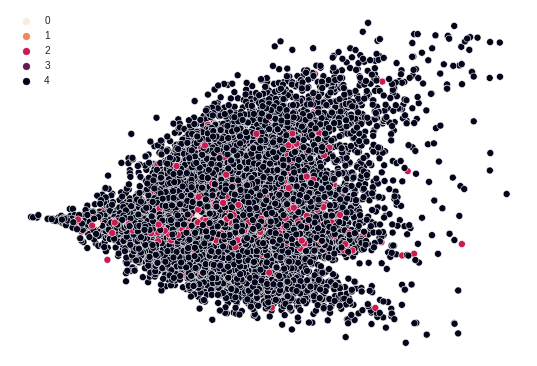

In [ ]:
#graph
sns.scatterplot(x=svd_red[:,0], y=svd_red[:,1], hue=h2_cluster_cm, palette="rocket_r")

plt.tight_layout()
plt.axis('off')
plt.show()
plt.show()

[[  16    6  371   17 4050]
 [  22    2  432   16 3988]
 [  16    1  404   12 4027]
 [  16    0  467    6 3971]
 [  16    0  444    1 3999]]


Text(51.0, 0.5, 'Score')

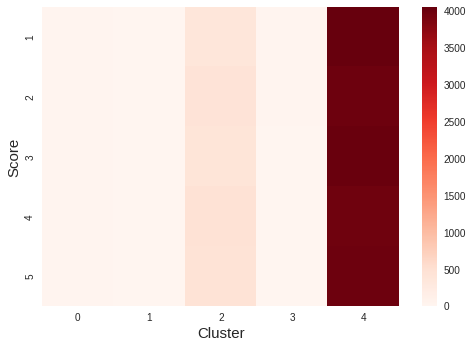

In [ ]:
h2_cluster_cm1 = h2_cluster_cm + 1 
cm5_cm = confusion_matrix(data_sample.Score, h2_cluster_cm1)
print(cm5_cm)
ax=sns.heatmap(cm5_cm,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

### OPTICS

In [ ]:
optics = OPTICS()
optics_labels_pred = optics.fit_predict(svd_red)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [ ]:
len(np.unique(optics_labels_pred))

35

In [ ]:
score_clustering(data_sample.Score, optics_labels_pred)

Rand index           : 0.21159841268596372
Adjusted Mutual Info : 0.006933403362348993
Homogeneity          : 0.005945060092820555
Completeness         : 0.10793298088382662
V measure            : 0.01126939051371963
Fowlkes Mallows      : 0.44283826922437414


### DBSCAN

#### DBSCAN with Euclidean metric

In [ ]:
dbscan_e = DBSCAN(eps=0.5, 
                  min_samples=10, 
                  metric = "euclidean")
# minimum number of points required to form a cluster (min_samples)
# maximum distance between points in a cluster (eps)

X = StandardScaler().fit_transform(svd_red)

db_clusters_e = dbscan_e.fit_predict(X)
db_labels_e = dbscan_e.labels_

n_clusters_ = len(set(db_labels_e)) - (1 if -1 in db_labels_e else 0)
n_noise_ = list(db_labels_e).count(-1)

In [ ]:
score_clustering(data_sample.Score, db_labels_e)

Rand index           : 0.1999641239517467
Adjusted Mutual Info : 4.276886172182672e-15
Homogeneity          : 1.034730525528068e-15
Completeness         : 1.0
V measure            : 2.0694610510561338e-15
Fowlkes Mallows      : 0.4471734830597032


#### DBSCAN with Manhattan metric

In [ ]:
dbscan_m = DBSCAN(eps=0.5, min_samples=10, metric = "manhattan")
# minimum number of points required to form a cluster (min_samples)
# maximum distance between points in a cluster (eps)

X = StandardScaler().fit_transform(svd_red)

db_clusters_m = dbscan_m.fit_predict(X)
db_labels_m = dbscan_m.labels_

n_clusters_ = len(set(db_labels_m)) - (1 if -1 in db_labels_m else 0)
n_noise_ = list(db_labels_m).count(-1)

In [ ]:
score_clustering(data_sample.Score, db_labels_m)

Rand index           : 0.1999641239517467
Adjusted Mutual Info : 4.276886172182672e-15
Homogeneity          : 1.034730525528068e-15
Completeness         : 1.0
V measure            : 2.0694610510561338e-15
Fowlkes Mallows      : 0.4471734830597032


### Birch

#### Birch with Elbow Method 1 Silhouette

In [ ]:
brc1 = Birch(n_clusters=optimal_number1)
brc1.fit_predict(svd_red)

brc_labels1 = brc1.labels_

In [ ]:
score_clustering(data_sample.Score, brc_labels1)

Rand index           : 0.23738278195024531
Adjusted Mutual Info : 0.0005247981236206838
Homogeneity          : 0.0004007661337152083
Completeness         : 0.0039447099349409495
V measure            : 0.0007276101049812716
Fowlkes Mallows      : 0.4330316767912774


In [ ]:
evaluate_clustering_unsup(svd_red, brc_labels1)
print("Number of clusters", optimal_number1)

Silhouette           : 0.036716489042765324
Calinski Harabasz    : 116.35103132210243
Davies Bouldin       : 3.372418460315018
Number of clusters 3


###### Confusion Matrix

[[4363   49   48]
 [4296   77   87]
 [4292   83   85]
 [4323   79   58]
 [4314   71   75]]


Text(51.0, 0.5, 'Score')

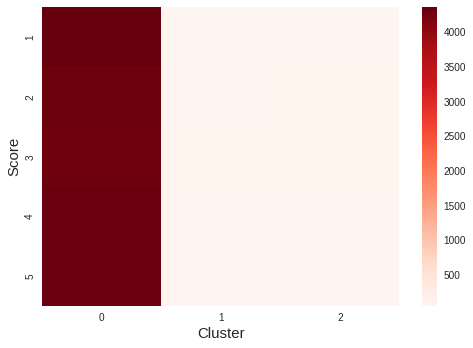

In [ ]:
brc_labels11 = brc_labels1 + 1 
cm_b2 = confusion_matrix(data_sample.Score, brc_labels11)
cm_b2 = np.delete(cm_b2, [3,4], 1)
print(cm_b2)
ax=sns.heatmap(cm_b2,
               cmap='Reds',
               xticklabels=["0","1","2"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

#### Birch with Elbow Method 2 Distortion

In [ ]:
brc2 = Birch(n_clusters=optimal_number2)
brc2.fit_predict(svd_red)

brc_labels2 = brc2.labels_

In [ ]:
score_clustering(data_sample.Score, brc_labels2)

Rand index           : 0.37713276370051785
Adjusted Mutual Info : 0.0023023221442051256
Homogeneity          : 0.0018041112625410847
Completeness         : 0.004829641878918086
V measure            : 0.0026269326343607755
Fowlkes Mallows      : 0.37591922337365075


In [ ]:
evaluate_clustering_unsup(svd_red, brc_labels2)
print("Number of clusters", optimal_number2)

Silhouette           : 0.028554969076504857
Calinski Harabasz    : 154.62026078740294
Davies Bouldin       : 4.2913482365552
Number of clusters 5


##### Graph + Confusion Matrix

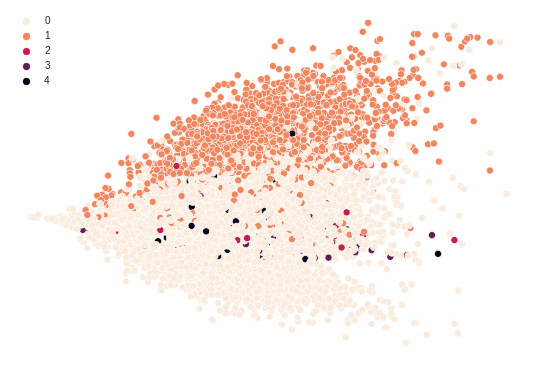

In [ ]:
#graph
sns.scatterplot(x=svd_red[:,0], y=svd_red[:,1], hue=brc_labels2, palette="rocket_r")

plt.tight_layout()
plt.axis('off')
plt.show()
plt.show()

[[3884  437   48   49   42]
 [3668  577   87   77   51]
 [3612  644   85   83   36]
 [3649  630   58   79   44]
 [3693  526   75   71   95]]


Text(51.0, 0.5, 'Score')

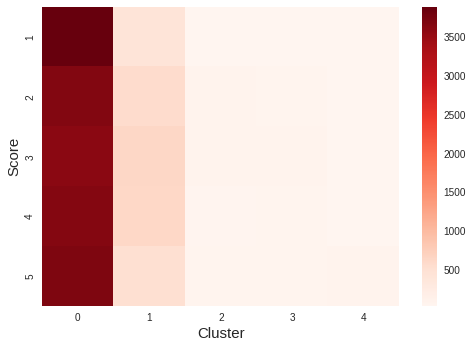

In [ ]:
brc_labels22 = brc_labels2 + 1 
cm5_b = confusion_matrix(data_sample.Score, brc_labels22)
print(cm5_b)
ax=sns.heatmap(cm5_b,
               cmap='Reds',
               xticklabels=["0","1","2","3","4"],
               yticklabels=["1","2","3","4","5"]).set_ylim(5,0)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Score', fontsize = 15)